<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/week_10/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SMOTE(Synthetic Miniority Oversampling Technique)**
### **[imbalanced data-learn](https://imbalanced-learn.org/stable/index.html)**

<img src ='https://imghub.insilicogen.com/media/photos/%EC%96%B8%EB%8D%94%EC%83%98%ED%94%8C%EB%A7%81%EA%B3%BC_%EC%98%A4%EB%B2%84%EC%83%98%ED%94%8C%EB%A7%81_P3B5KVU.png'>

<img src='https://iq.opengenus.org/content/images/2019/09/COVER-1.PNG'>

### **SMOTE for Imbalanced Dataset**

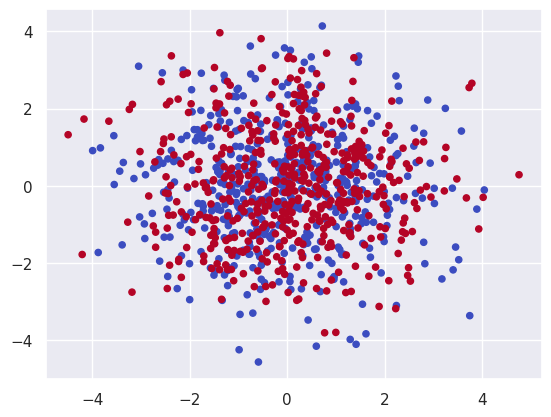

In [61]:
plt.rcParams['figure.figsize'] = (6.4, 4.8)
from sklearn.datasets import make_blobs
n_samples_1 = 500; n_samples_2 = 500
centers = [[0.0, 0.0], [0.0, 0.0]]; clusters_std = [1.5, 1.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers,
                  cluster_std=clusters_std, random_state=0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

In [62]:
# prompt: randomforest로 예측
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

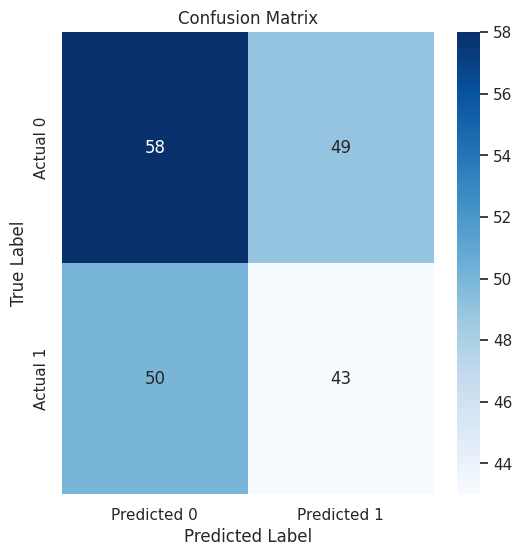

In [66]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [70]:
# prompt: classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.54      0.54      0.54       107
           1       0.47      0.46      0.46        93

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



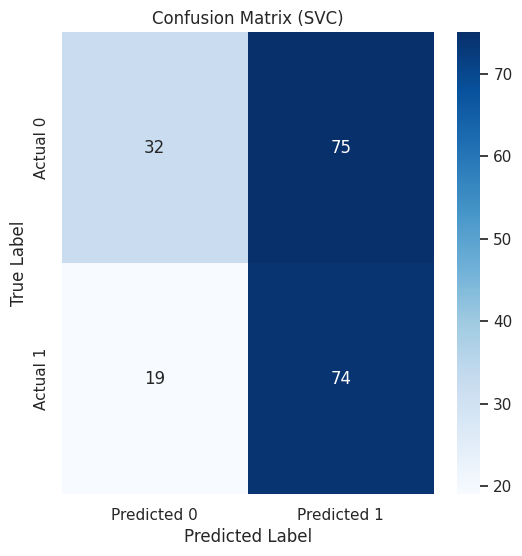

In [71]:
# prompt: SVC RBF로 예측하기

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# ... (previous code) ...

# Initialize the SVC model with an RBF kernel
svc_model = SVC(kernel='rbf', random_state=0, probability=True) # probability=True for predict_proba

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

# Train the SVC model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_predict_svc = svc_model.predict(X_test)
y_scores_svc = svc_model.predict_proba(X_test)


# Create and display the confusion matrix for the SVC model
cm_svc = confusion_matrix(y_test, y_predict_svc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVC)")
plt.show()


In [73]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       107
           1       0.50      0.80      0.61        93

    accuracy                           0.53       200
   macro avg       0.56      0.55      0.51       200
weighted avg       0.57      0.53      0.50       200



In [75]:
model

RandomForestClassifier(random_state=0)

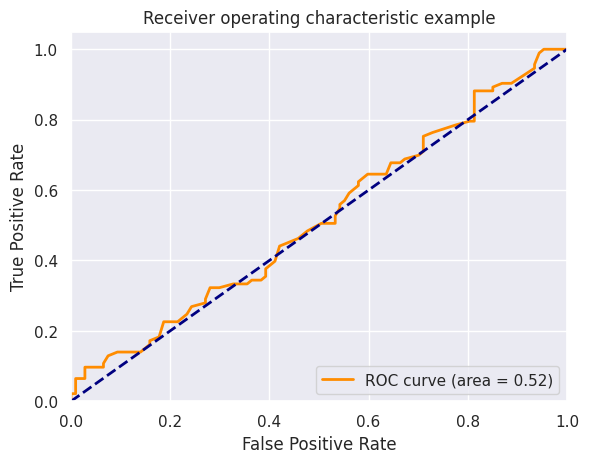

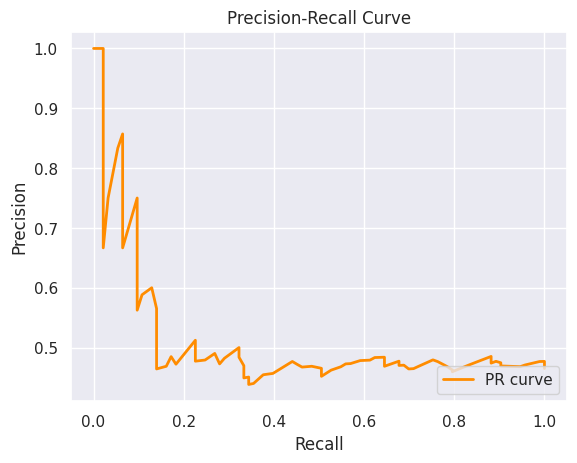

In [74]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have your model, X_test, and y_test defined

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

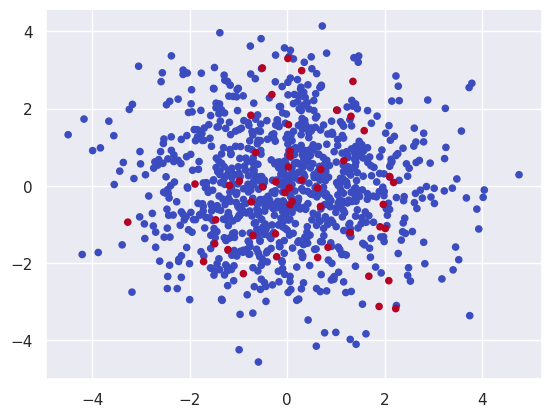

In [76]:
plt.rcParams['figure.figsize'] = (6.4, 4.8)
from sklearn.datasets import make_blobs
n_samples_1 = 950; n_samples_2 = 50
centers = [[0.0, 0.0], [0.0, 0.0]]; clusters_std = [1.5, 1.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers,
                  cluster_std=clusters_std, random_state=0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

In [79]:

model = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_scores = model.predict_proba(X_test)

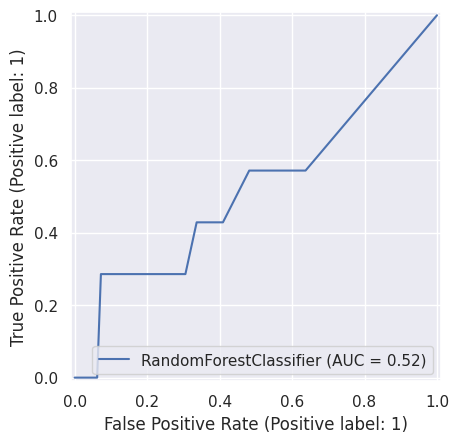

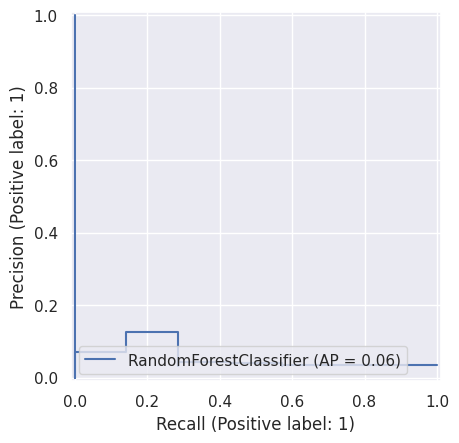

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       193
           1       0.00      0.00      0.00         7

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.93      0.96      0.95       200



In [80]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report

# For ROC curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# For Precision-Recall curve
pr_display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Print classification report
print(classification_report(y_test, y_predict))

In [81]:
tn = data.iloc[0,0]; fp=data.iloc[0,1]
fn = data.iloc[1,0]; tp=data.iloc[1,1]
fpr = fp/data.iloc[0,2]; tpr = tp/data.iloc[1,2]
print(f'알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 {fpr*100} %')
print(f'알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 {tpr*100} %')

알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 1.0 %
알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 100.0 %


In [84]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
Counter(y_train)

Counter({np.int64(0): 757, np.int64(1): 43})

### **방법 1 . 불균형데이터 처리 방법**

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [89]:
kf = KFold(n_splits=5)
lgr = LogisticRegression(class_weight='balanced', random_state=11)
params = [{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}]
grid = GridSearchCV(lgr, param_grid=params, cv=kf, scoring = 'recall_macro')

In [90]:
y_predict = grid.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.52      0.67       193
           1       0.03      0.43      0.06         7

    accuracy                           0.52       200
   macro avg       0.50      0.47      0.37       200
weighted avg       0.93      0.51      0.65       200



### **방법 2 . 불균형데이터 처리 방법**

In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state=10)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train.shape, X_train_smote.shape
Counter(y_train), Counter(y_train_smote)

(Counter({np.int64(0): 757, np.int64(1): 43}),
 Counter({np.int64(0): 757, np.int64(1): 378}))

In [93]:
X_train, y_train = X_train_smote, y_train_smote
X_train.shape, y_train.shape

((1135, 2), (1135,))

In [94]:
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
classifiers = {}
classifiers.update({'LGR': LogisticRegression(random_state=11, solver ='liblinear')})
classifiers.update({'SVC': SVC(random_state=11, max_iter=300, probability=True)})
classifiers.update({'Decisiontree': DecisionTreeClassifier()})
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})

In [96]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers.update({'Ridge': RidgeClassifier()})
classifiers.update({'Extra Trees': ExtraTreeClassifier()})

classifiers

{'LGR': LogisticRegression(random_state=11, solver='liblinear'),
 'SVC': SVC(max_iter=300, probability=True, random_state=11),
 'Decisiontree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Ridge': RidgeClassifier(),
 'Extra Trees': ExtraTreeClassifier()}

In [97]:
DECISION_FUNCTIONS = {'SVC', 'Ridge'}

In [98]:
parameters = {}
parameters.update({'LGR':
{
'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']}
})

In [99]:
parameters.update({'SVC':
{
'classifier__kernel': ['linear', 'rbf', 'poly'],
'classifier__gamma': ['auto'],
'classifier__C': [0.1, 0.5, 1, 5, 10, 50, 100],
'classifier__degree': [1, 2, 3, 4, 5, 6]
}})

In [100]:
parameters.update({'Decisiontree':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [101]:
parameters.update({'Random Forest':
{
'classifier__n_estimators': [200],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [102]:
parameters.update({'Gradient Boosting':
{
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [103]:
parameters.update({'Ridge':
{
'classifier__alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
}})

In [104]:
parameters.update({'Extra Trees':
{
'classifier__criterion' :['gini', 'entropy'],
'classifier__splitter': ['best', 'random'],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [1,2,3, 4, 5, 6, 7, 8],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
}})

In [105]:
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, recall_score, log_loss, brier_score_loss

In [108]:
results = {}
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    print(classifier_label)
    steps = [('scaler', StandardScaler()), ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]

    gs = RandomizedSearchCV(pipeline, param_grid, cv = 2,  n_iter = 2,
                            scoring = 'recall_macro')


    y_pred = gs.fit(X_train, y_train).predict(X_test)

    if classifier_label in DECISION_FUNCTIONS:
        y_proba = gs.decision_function(X_test)
        ap = average_precision_score(y_test, y_proba)
    else:
        y_proba = gs.predict_proba(X_test)[:,1]
        ap = average_precision_score(y_test, y_proba)


    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'AUROC': roc_auc_score(y_test, y_proba),
              'Average PR': ap,
              'F1-score': f1_score(y_test, y_pred),
              'CV accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
             }

    results.update({classifier_label: result})
    dump(gs.fit(X_train, y_train), 'smote_%s.joblib'%classifier_label)

  0%|          | 0/7 [00:00<?, ?it/s]

LGR
SVC
Decisiontree
Random Forest
Gradient Boosting
Ridge
Extra Trees


In [109]:
pd.DataFrame(results).T.sort_values(by = 'F1-score', ascending=False)

,Best Parameters,Training recall_macro,AUROC,Average PR,F1-score,CV accuracy,Log_loss
Gradient Boosting,"{'classifier__subsample': 0.8, 'classifier__n_...",0.697193,0.417469,0.066453,0.055556,NaN,0.431038
Decisiontree,"{'classifier__splitter': 'best', 'classifier__...",0.61275,0.397483,0.028902,0.054054,0.5753,0.698992
SVC,"{'classifier__kernel': 'rbf', 'classifier__gam...",0.612676,0.433753,0.033139,0.045977,0.514125,12.835625
Extra Trees,"{'classifier__splitter': 'best', 'classifier__...",0.66296,0.361954,0.026948,0.028169,0.615018,1.496578
LGR,"{'classifier__penalty': 'l1', 'classifier__C':...",0.496702,0.436714,0.041831,0.0,0.499338,0.442661
Random Forest,"{'classifier__n_jobs': -1, 'classifier__n_esti...",0.507938,0.415248,0.043415,0.0,NaN,0.413627
Ridge,{'classifier__alpha': 0.0001},0.493402,0.445596,0.047007,0.0,0.496035,1.261613


In [110]:
import glob
glob.glob('sm*.joblib')

['smote_Decisiontree.joblib',
 'smote_Gradient Boosting.joblib',
 'smote_Extra Trees.joblib',
 'smote_LGR.joblib',
 'smote_Ridge.joblib',
 'smote_Random Forest.joblib',
 'smote_SVC.joblib']

In [111]:
lgr = load('smote_LGR.joblib')
y_predict = lgr.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       193
           1       0.00      0.00      0.00         7

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.93      0.96      0.95       200



In [112]:
from imblearn.pipeline import Pipeline, make_pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(random_state=13,
                                                     class_weight='balanced'))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

array([0.84111953, 0.71540881, 0.72232207, 0.79215839, 0.34140969])

In [113]:
imba_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=13))])

In [114]:
param = {
'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
'randomforestclassifier__max_depth': [int(x) for x in np.linspace(5, 20, 10)],
'randomforestclassifier__min_samples_split': [2, 5, 10],
'randomforestclassifier__min_samples_leaf': [1, 2, 4],
}

In [115]:
rs = RandomizedSearchCV(imba_pipeline, param, cv=kf,  n_iter=50,
                        scoring='recall_macro')
y_predict = rs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       193
           1       0.05      0.29      0.09         7

    accuracy                           0.79       200
   macro avg       0.51      0.55      0.48       200
weighted avg       0.94      0.79      0.85       200



### **Naive Oversampling**

In [116]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(np.int64(0), 950), (np.int64(1), 950)]


In [118]:
# prompt: 훈련과 검증데이터 구분

from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # 80% train, 20% test
# You can adjust test_size and random_state as needed


In [119]:
y_predict = grid.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       189
           1       0.54      0.51      0.52       191

    accuracy                           0.53       380
   macro avg       0.53      0.53      0.53       380
weighted avg       0.53      0.53      0.53       380



### **From random over-sampling to SMOTE and ADASYN**

In [121]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_smote = LogisticRegression().fit(X_resampled, y_resampled)

y_predict = clf_smote.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

[(np.int64(0), 950), (np.int64(1), 950)]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       189
           1       0.54      0.51      0.52       191

    accuracy                           0.54       380
   macro avg       0.54      0.54      0.54       380
weighted avg       0.54      0.54      0.54       380



In [122]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)

y_predict = clf_adasyn.predict(X_test)
confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

[(np.int64(0), 950), (np.int64(1), 944)]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       189
           1       0.54      0.51      0.53       191

    accuracy                           0.54       380
   macro avg       0.54      0.54      0.54       380
weighted avg       0.54      0.54      0.54       380

